# Exploratory Data Analysis

This file explores data to:
* identify where data cleansing and transformation is required
* descriptive statistics and understanding of overall distribution
* filter down features that matter to the problem

Findings inform pre-processing pipeline and final model selection.

### Dependencies

In [1]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data
from eda_utils import Eda, Signal

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

In [2]:
random_seed = int(os.getenv('RANDOM_SEED'))
random_seed

42

### Read & Describe Dataframe

In [3]:
if os.path.exists(load_data.combined_csv):
    pass
else:
    load_data.__main__()

df = pd.read_csv(load_data.combined_csv,index_col=0)
dp = load_data.DataPreprocessor(df)
df = dp.preprocess().get_dataframe()

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])
df.head()

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays,R2_voltage_AC_phase_A_angle,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_angle,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_angle,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_angle,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_angle,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_angle,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_angle,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_angle,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_angle,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_angle,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_angle,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_angle,R2_pos_neg_zero_current_phase_C_magnitude,R2_frequency_for_relays,R2_frequency_delta_dFdt_for_relays,R2_appearance_impedance_for_relays,R2_appearance_impedance_angle_for_relays,R2_status_flag_for_relays,R3_voltage_AC_phase_A_angle,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_angle,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_angle,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_angle,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_angle,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_angle,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_angle,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_angle,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_angle,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_angle,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_angle,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_angle,R3_pos_neg_zero_current_phase_C_magnitude,R3_frequency_for_relays,R3_frequency_delta_dFdt_for_relays,R3_appearance_impedance_for_relays,R3_appearance_impedance_angle_for_relays,R3_status_flag_for_relays,R4_voltage_AC_phase_A_angle,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_angle,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_angle,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_angle,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_angle,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_angle,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_angle,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_angle,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_angle,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_angle,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_angle,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_angle,R4_pos_neg_zero_current_phase_C_magnitude,R4_frequency_for_relays,R4_frequency_delta_dFdt_for_relays,R4_appearance_impedance_for_relays,R4_appearance_impedance_angle_for_relays,R4_status_flag_for_re

In [4]:
# summary statistics for DFs and columns
eda = Eda(df)
df_stats = eda.get_summary_df_stats()
col_stats = eda.get_summary_col_stats()
eda.__str__()

EDA with Summary DF Statistics: ['n_rows', 'n_cols', 'n_nulls'] 
 Summary Column Statistics: ['dtype', 'pct_null', 'n_unique', 'count', 'mean', 'min', '25%', '50%', '75%', 'max', 'std']


In [5]:
df_stats

,n_rows,n_cols,n_nulls
0,78377,135,0


In [7]:
for i in df.columns.to_list():
    if len(df[i].unique()) < 25:
        print(i, df[i].unique())
    else: continue

R1_status_flag_for_relays [     0.   2048.   2058.   2056. 270336. 272384. 272394.]
R2_status_flag_for_relays [     0. 270336.]
R3_status_flag_for_relays [     0.   2048.   2056. 270336. 272384.]
R4_status_flag_for_relays [ 0.00000000e+00  2.05800000e+03  2.04800000e+03  2.70336000e+05
  1.34844641e+02 -1.01233120e+01 -4.59983320e+01  3.64633850e+01
  1.54798752e+02 -2.67676770e+01  6.93466850e+01  4.96905240e+01]
control_panel_log1 [0. 1.]
control_panel_log2 [0. 1.]
control_panel_log3 [0. 1.]
control_panel_log4 [0. 1.]
relay1_log [0. 1.]
relay2_log [0. 1.]
relay3_log [0. 1.]
relay4_log [0. 1.]
snort_log1 [0. 1.]
snort_log2 [0. 1.]
snort_log3 [0. 1.]
snort_log4 [0. 1.]
source_file [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
scenario_class ['no event' 'attack' 'natural']
is_attack [0 1]


### Useful Features

In [8]:
ids = ['source_file','sample_id','scenario_type']

logs_and_statuses = [
  'control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4', \
  'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', \
  'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4', \
  'R1_status_flag_for_relays','R2_status_flag_for_relays','R3_status_flag_for_relays','R4_status_flag_for_relays']

binary_features = ['control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4', \
 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', \
 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4', \
  'is_attack']

discrete_features = ['R1_status_flag_for_relays','R2_status_flag_for_relays','R3_status_flag_for_relays','R4_status_flag_for_relays', \
                     'scenario_class','marker']

target_features = ['is_attack','scenario_class','marker']

R1_features = [i for i in df.columns.to_list() if 'R1' in i]
R2_features = [i for i in df.columns.to_list() if 'R2' in i]
R3_features = [i for i in df.columns.to_list() if 'R3' in i]
R4_features = [i for i in df.columns.to_list() if 'R4' in i]


### Distribution of Cyber Attacks / Event Types

Using matplotlib backend: module://matplotlib_inline.backend_inline


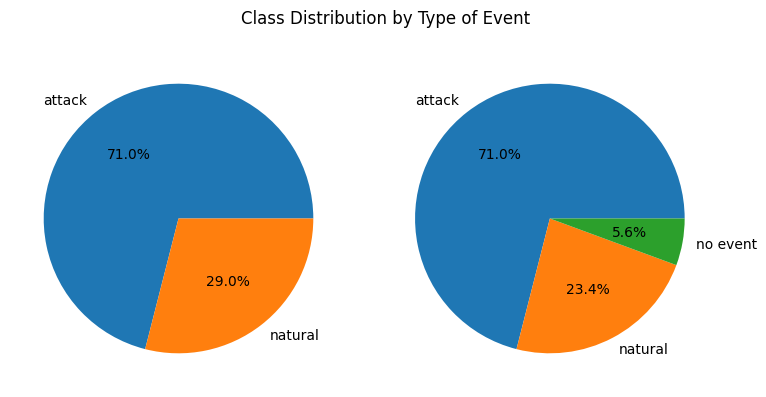

In [9]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
binary_class_counts = df['is_attack'].value_counts()
tertiary_class_counts = df['scenario_class'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(binary_class_counts, labels=['attack','natural'], autopct='%1.1f%%')
ax2.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


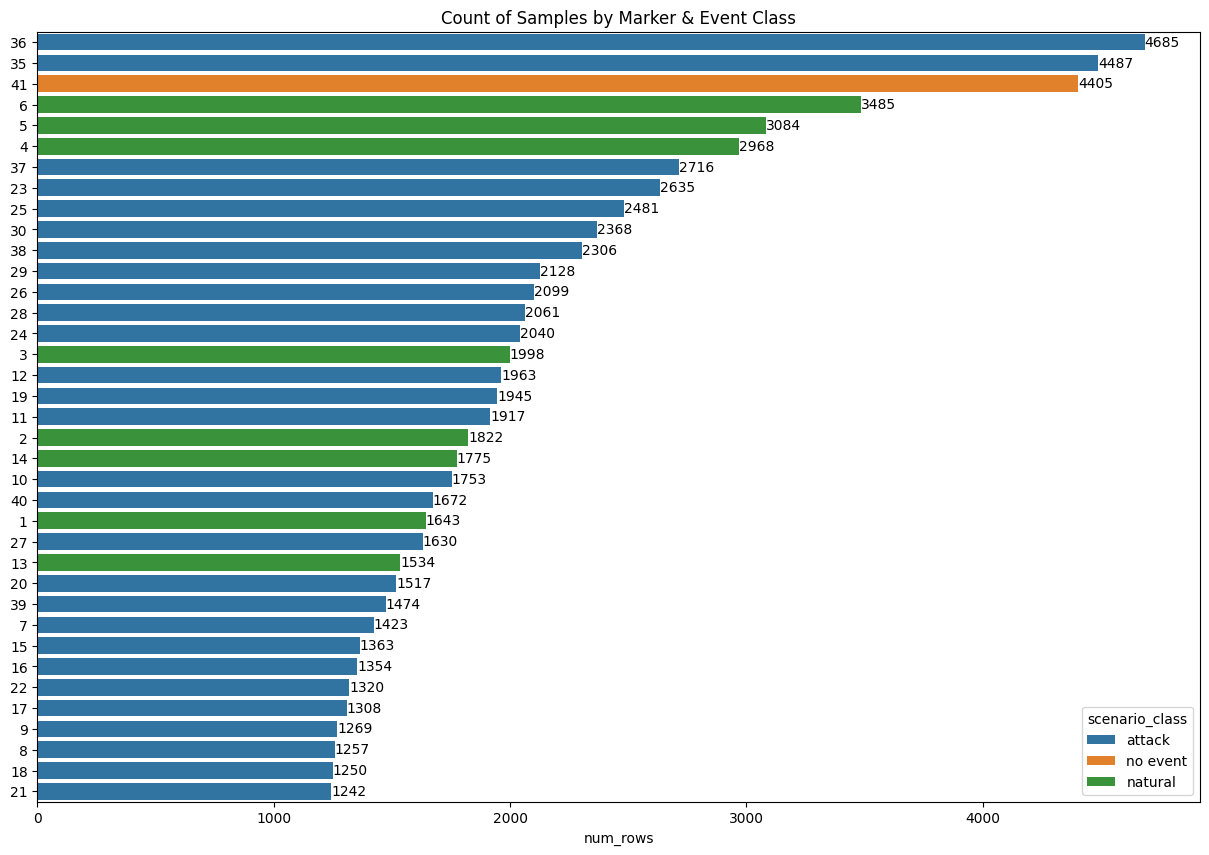

In [10]:
%matplotlib

# get marker class sizes
class_counts = df.loc[:,['scenario_class','marker','snort_log1']].groupby(['scenario_class','marker']).count()
class_counts.columns = ['num_rows']
filt = class_counts['num_rows'] != 0
class_counts = class_counts.loc[filt,:].sort_values(by='num_rows',ascending=False)

# visualize overall class sizes by row count
plt.figure(figsize=(15,10))

g = sns.barplot(x=class_counts['num_rows'], y=[str(i) for i in class_counts.index.get_level_values(1).to_list()], hue=class_counts.index.get_level_values(0))
for i in g.containers:
    g.bar_label(i,)

plt.title('Count of Samples by Marker & Event Class')
plt.show()

### Sensor Data - What does an event actually look like?

Wave form representing real time signal: $$x(t) = X_m\cos(\omega t + \phi)$$

Where $X_m$ is the magnitude, $\omega$ is $2\pi$ times the frequency, and $\phi$ is the angle. This is valid for voltage and current.

In synchrophasor notation, the magnitude is not given directly. It is typically reported as RMS value, which is based on the integral of the waveform and simplified to $\frac{X_{max}}{\sqrt{2}}$.

Power can also be shown as a waveform; it is the product of voltage and current.
$$p(t) = v(t) \times i(t)$$

In [11]:
# lets just examine 1 phase from R1 sensor
R1_phase_A_features = [i for i in R1_features if 'phase_A' in i] \
    + [i for i in R1_features if 'impedance' in i] \
    + [i for i in R1_features if 'freq' in i] \
    + ['synthetic_datetime'] \
    + target_features

R1_phase_A_features

['R1_voltage_AC_phase_A_angle',
 'R1_voltage_AC_phase_A_magnitude',
 'R1_current_AC_phase_A_angle',
 'R1_current_AC_phase_A_magnitude',
 'R1_pos_neg_zero_voltage_phase_A_angle',
 'R1_pos_neg_zero_voltage_phase_A_magnitude',
 'R1_pos_neg_zero_current_phase_A_angle',
 'R1_pos_neg_zero_current_phase_A_magnitude',
 'R1_appearance_impedance_for_relays',
 'R1_appearance_impedance_angle_for_relays',
 'R1_frequency_for_relays',
 'R1_frequency_delta_dFdt_for_relays',
 'synthetic_datetime',
 'is_attack',
 'scenario_class',
 'marker']

In [12]:
# pick 1 sample
sample_bag = df['sample_id'].unique()
choice = np.random.choice(sample_bag, 1)[0]
# choice = df['sample_id'].min()
sample = df.loc[df['sample_id'] == choice,R1_phase_A_features]
sample.head(15)

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,synthetic_datetime,is_attack,scenario_class,marker
38832,125.873098,129352.9999,124.675616,492.38279,125.896016,129352.9999,123.586996,497.14365,8.052295,0.010501,59.997,0.01,1970-01-01 07:09:51.595389,1,attack,19
38833,125.460568,129528.5128,123.741695,495.49566,125.477757,129528.5128,122.824963,499.34097,7.918284,0.021060,59.999,0.01,1970-01-01 07:09:51.603722,1,attack,19
38834,125.311599,130155.3446,123.065605,497.69298,125.328788,130155.3446,122.292112,500.25652,7.788931,0.030477,59.999,0.00,1970-01-01 07:09:51.612055,1,attack,19
38835,125.282952,130406.0773,122.733289,498.79164,125.305870,130406.0773,122.074388,500.80585,7.736327,0.037145,60.001,0.00,1970-01-01 07:09:51.620388,1,attack,19
38836,125.282952,130431.1505,122.681723,498.79164,125.294411,130431.1505,121.999903,501.17207,7.741006,0.036936,60.000,0.00,1970-01-01 07:09:51.628721,1,attack,19
38837,125.219926,130631.7367,122.166061,501.17207,125.237115,130656.8100,121.581644,502.45384,7.639610,0.046429,60.000,0.00,1970-01-01 07:09:51.637054,1,attack,19
38838,150.647793,132060.9131,0.000000,0.00000,150.664982,132085.9864,0.000000,0.00000,inf,0.000000,60.053,-0.07,1970-01-01 07:09:51.645387,1,attack,19
38839,157.878520,134793.8995,0.000000,0.00000,157.889980,134818.9728,0.000000,0.00000,inf,0.000000,60.023,0.00,1970-01-01 07:09:51.653720,1,attack,19
38840,129.058743,133139.0637,131.035448,478.28332,129.075932,133139.0637,131.396411,475.53667,7.618280,-0.031696,59.973,0.05,1970-01-01 07:09:51.662053,1,attack,19
38841,128.199307,132411.9389,130.256225,473.33935,128.210766,132411.9389,130.536975,470.22648,7.663946,-0.034595,59.975,0.01,1970-01-01 07:09:51.670386,1,attack,19


In [13]:
s = Signal(sample)

In [14]:
sample.shape

(166, 16)

In [15]:
v_mag = sample['R1_voltage_AC_phase_A_magnitude']
v_angle = sample['R1_voltage_AC_phase_A_angle']
i_mag = sample['R1_current_AC_phase_A_magnitude']
i_angle = sample['R1_current_AC_phase_A_angle']
v_wave = s.waveform(v_mag, v_angle)
i_wave = s.waveform(i_mag, i_angle)
p_wave = s.instant_power(v_wave, i_wave)
p_avg = s.avg_power(v_mag, i_mag, v_angle, i_angle)
sample['R1_Phase_A_voltage_waveform'] = v_wave
sample['R1_Phase_A_current_waveform'] = i_wave
sample['R1_Phase_A_power_waveform'] = p_wave
sample['R1_Phase_A_avg_power'] = p_avg
# microseconds = sample['synthetic_datetime'].dt.microsecond
sample_class = sample['scenario_class'].unique()[0]

Using matplotlib backend: module://matplotlib_inline.backend_inline


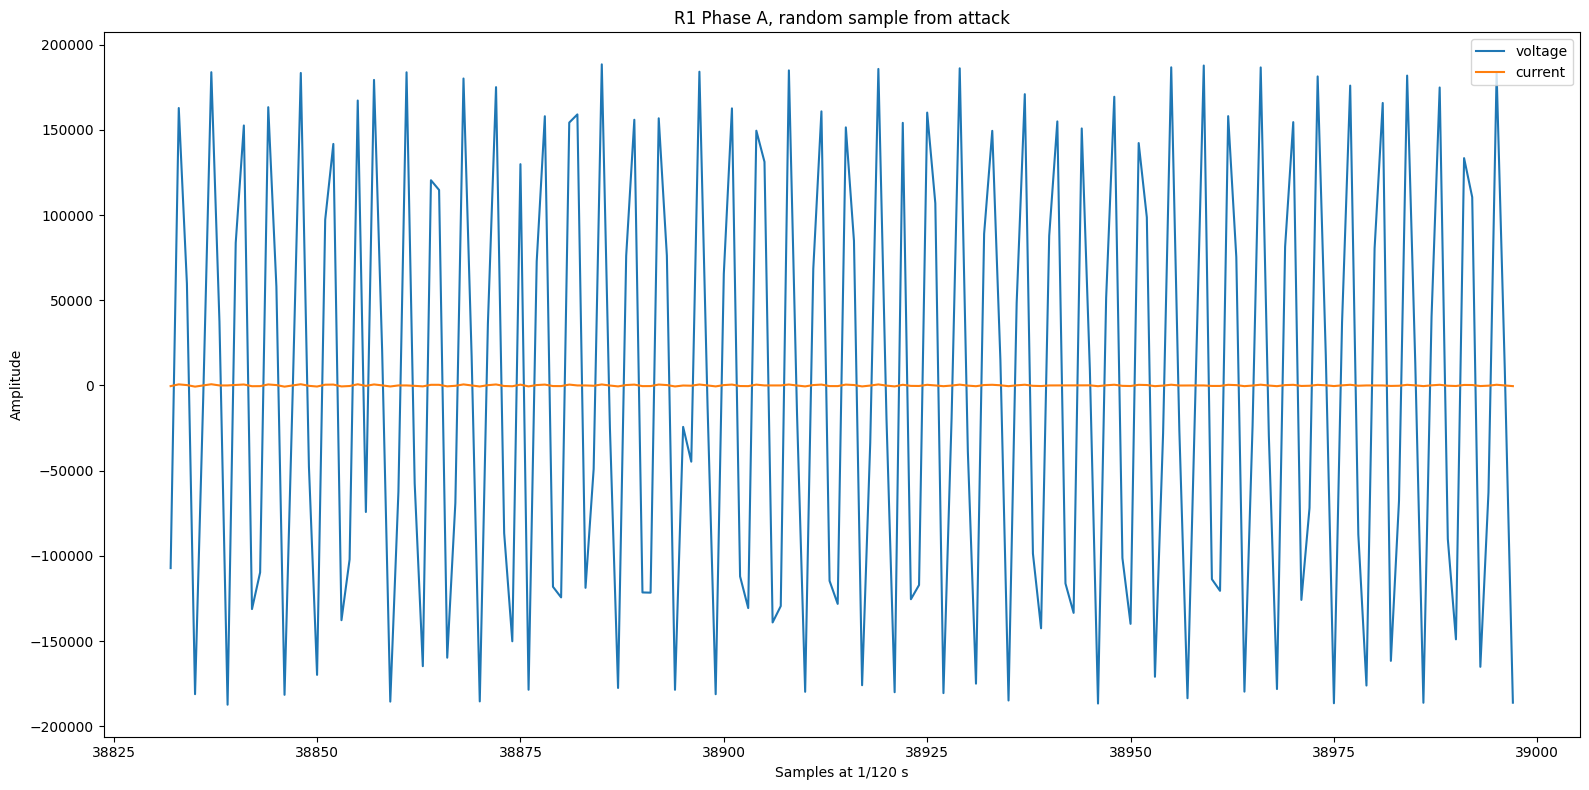

In [17]:
%matplotlib
plt.figure(figsize=(16, 8))
plt.plot(v_wave,label='voltage')
plt.plot(i_wave,label='current')
# plt.plot(p_wave,label='power')
# plt.plot(p_avg,label='avg power')
plt.ylabel('Amplitude')
plt.xlabel('Samples at 1/120 s')
plt.title(f'R1 Phase A, random sample from {sample_class}')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
df.loc[(df['sample_id'] == choice) & (df['R1_appearance_impedance_for_relays'] == np.inf),R1_features]

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays
38838,150.647793,132060.9131,30.664701,132035.8398,-89.329850,132111.0596,0.0,0.0,0.0,0.0,0.0,0.0,150.664982,132085.9864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.053,-0.07,inf,0.0,2048.0
38839,157.878520,134793.8995,37.906888,134768.8263,-82.110582,134869.1193,0.0,0.0,0.0,0.0,0.0,0.0,157.889980,134818.9728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.023,0.00,inf,0.0,0.0
38860,-21.709371,134267.3609,-141.692463,134217.2143,98.296639,134342.5807,0.0,0.0,0.0,0.0,0.0,0.0,-21.697912,134267.3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.025,0.01,inf,0.0,0.0
38861,-18.237247,134217.2143,-138.214609,134167.0678,101.780223,134292.4341,0.0,0.0,0.0,0.0,0.0,0.0,-18.220058,134217.2143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.014,-0.01,inf,0.0,0.0
38882,-164.049276,134317.5074,75.991392,134292.4341,-44.014618,134392.7272,0.0,0.0,0.0,0.0,0.0,0.0,-164.026358,134317.5074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.016,-0.02,inf,0.0,0.0
38883,-161.631394,133740.8222,78.397815,133715.7489,-41.602466,133816.0420,0.0,0.0,0.0,0.0,0.0,0.0,-161.619935,133740.8222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.009,0.00,inf,0.0,0.0
38905,-77.114390,129829.3921,162.909090,129779.2455,42.903080,129879.5386,0.0,0.0,0.0,0.0,0.0,0.0,-77.102930,129829.3921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.064,-0.04,inf,0.0,2048.0
38906,-73.052119,131308.7150,166.971361,131283.6417,46.988269,131383.9348,0.0,0.0,0.0,0.0,0.0,0.0,-73.034930,131333.7883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.053,-0.06,inf,0.0,2048.0
38907,-63.357673,134242.2876,176.682995,134217.2143,56.682715,134317.5074,0.0,0.0,0.0,0.0,0.0,0.0,-63.334755,134267.3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.016,-0.02,inf,0.0,0.0
38926,174.694832,129854.4653,54.711740,129829.3921,-65.282811,129954.7584,0.0,0.0,0.0,0.0,0.0,0.0,174.706291,129879.5386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.060,-0.02,inf,0.0,2048.0
